# Анализ данных по рекламным кампаниям

Для анализа данных и получения полезных выводов для дальнейшей работы медиабайеров, можно провести следующую декомпозицию анализа:

1. Анализ по географическим данным (Geo):

Определить, в каких географических зонах кампании показывают себя лучше всего (по показам, кликам, установкам, регистрациям, доходу).

Определить, в каких геозонах кампании показывают себя хуже всего и возможные причины.

2. Оценка медиабайеров (Buyer):

Определить, какой медиабайер достигает лучших показателей по окупаемости (ROI), исходя из выручки и затрат.

Сравнить производительность разных медиабайеров в разных кампаниях и геозонах.

3. CPI (Стоимость установки):

Рассчитать стоимость установки (CPI) для каждой кампании и медиабайера.

Идентифицировать кампании с наименьшей стоимостью установки.

4. Выручка и покупки (Revenue & Payers):

Оценить, какие кампании привлекают больше покупателей (Payers).

Выявить лидеров по выручке.


## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('C:\\Users\\Matvey Wonder\\Desktop\\работа\\test_data.csv')

In [3]:
df.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,"3208,440002","1163,521408","162,220001",64,"1381,310062","199,749999",79,"1527,013835","276,629998",83
1,2,north america,buyer_2,245542,6306,3401,2448,"1569,519999","833,059639","37,25",17,"1200,964697","69,340001",19,"1449,001828","120,250001",22
2,3,north america,buyer_1,1281103,35724,13315,8101,"1231,999998","459,6826","3,26",4,"524,987826","24,7",6,"572,633765","24,7",6
3,4,north america,buyer_1,215538,9987,3119,1857,"1228,129999","602,77816","26,13",11,"830,113889","33,439999",12,"1042,831595","57,530002",12
4,5,western europe,buyer_2,335878,7343,3952,2955,"872,570005","427,807238","19,030001",4,"577,039081","20,640001",5,"714,554179","32,150001",6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Campaign_id        87 non-null     int64 
 1   Geo                87 non-null     object
 2   Buyer              87 non-null     object
 3   Impressions        87 non-null     int64 
 4   Clicks             87 non-null     int64 
 5   Installs           87 non-null     int64 
 6   Registrations      87 non-null     int64 
 7   Spend              87 non-null     object
 8   Revenue_ad1d       87 non-null     object
 9   Revenue_in_app1d   87 non-null     object
 10  Payers1d           87 non-null     int64 
 11  Revenue_ad7d       87 non-null     object
 12  Revenue_in_app7d   87 non-null     object
 13  Payers7d           87 non-null     int64 
 14  Revenue_ad30d      87 non-null     object
 15  Revenue_in_app30d  87 non-null     object
 16  Payers30d          87 non-null     int64 
dtyp

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Campaign_id          0
Geo                  0
Buyer                0
Impressions          0
Clicks               0
Installs             0
Registrations        0
Spend                0
Revenue_ad1d         0
Revenue_in_app1d     0
Payers1d             0
Revenue_ad7d         0
Revenue_in_app7d     0
Payers7d             0
Revenue_ad30d        0
Revenue_in_app30d    0
Payers30d            0
dtype: int64

В целом данные качественные. Отсутствуют пропуски и дубликаты. Стоит привести столбцы к соответствующим типам данных и изменить регистр.

## Предобработка данных

In [7]:
df = df.replace(',', '.', regex=True)

In [8]:
wrong_types = ['Spend', 'Revenue_ad1d', 'Revenue_in_app1d', 'Revenue_ad7d', 
               'Revenue_in_app7d', 'Revenue_ad30d', 'Revenue_in_app30d']

for i in wrong_types:
    df[i] = df[i].astype(float)

In [9]:
df.columns = df.columns.str.lower()

## Исследовательский анализ

### 1. Анализ по географическим данным

In [10]:
all_company = df.groupby('geo')['campaign_id'].count().reset_index()
all_company

,geo,campaign_id
0,australia oceania,1
1,cis,10
2,latin america,3
3,north africa,2
4,north america,48
5,tropical africa,1
6,western europe,22


Всего в датасете 7 регионов. Больше всего компаний в регионе north america. Стоит отметить, что в регионах: australia oceania, tropical africa по одной компании, а north africa и latin america имеют 2-3, что очень мало по сравнению с другими.

#### Регионы

In [11]:
def top_geo(byvalue,xvalue,yvalue,title):

    grouped_geo = df.groupby('geo').sum().reset_index().sort_values(by=byvalue,ascending=False)

    plt.figure(figsize = (14,6))

    ax = sns.barplot(x=xvalue, y=yvalue, data=grouped_geo)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
    
    ax.set_title(title)
    ax.set_xlabel('Регион')
    ax.set_ylabel('Количество')

    plt.show()

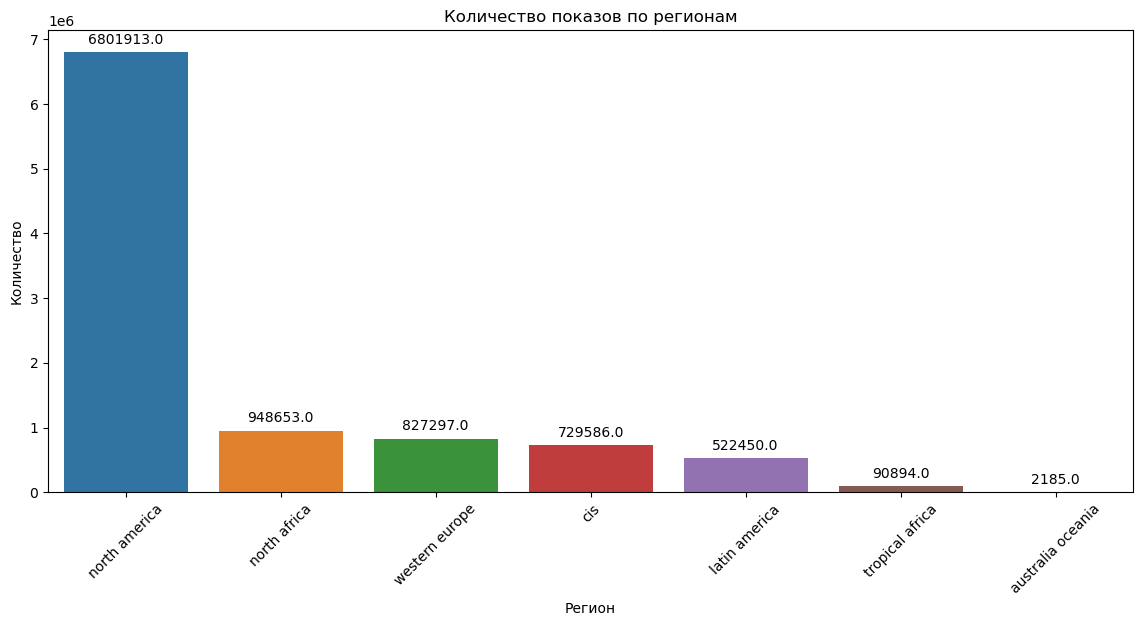

In [12]:
top_geo('impressions','geo','impressions','Количество показов по регионам')

По колличеству показов заметно впереди регион north america. Худшие показатели у тропической Африки и Австралии Океании. Остальные регионы примерно на одном уровне.

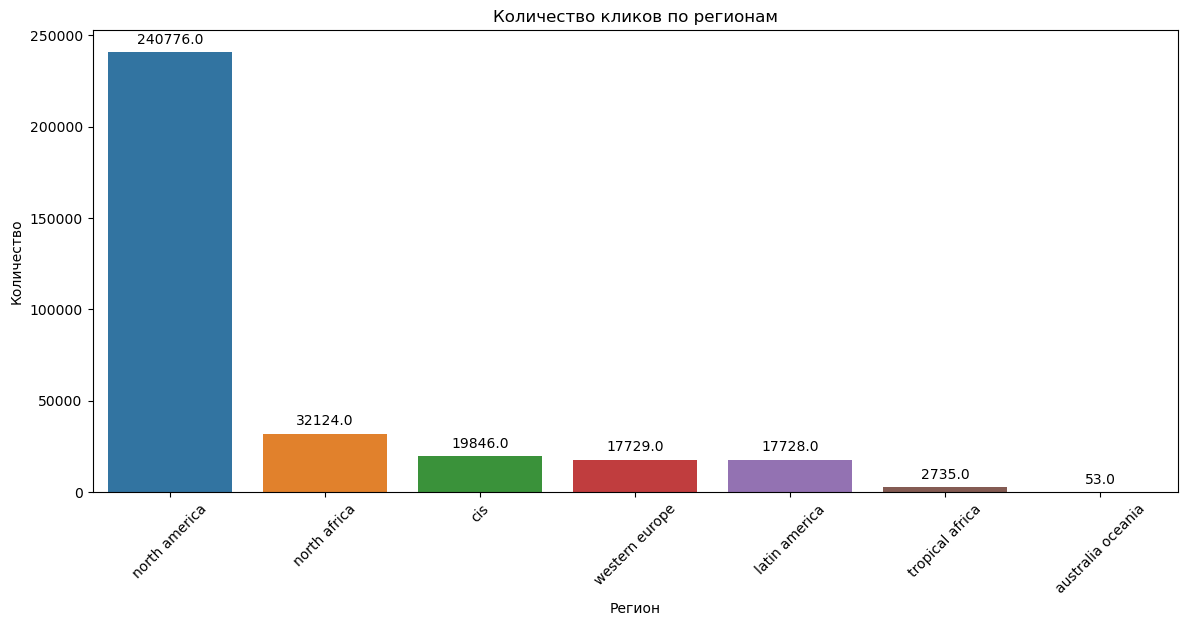

In [13]:
top_geo('clicks','geo','clicks','Количество кликов по регионам')

Аналогичная ситуация с кликами.

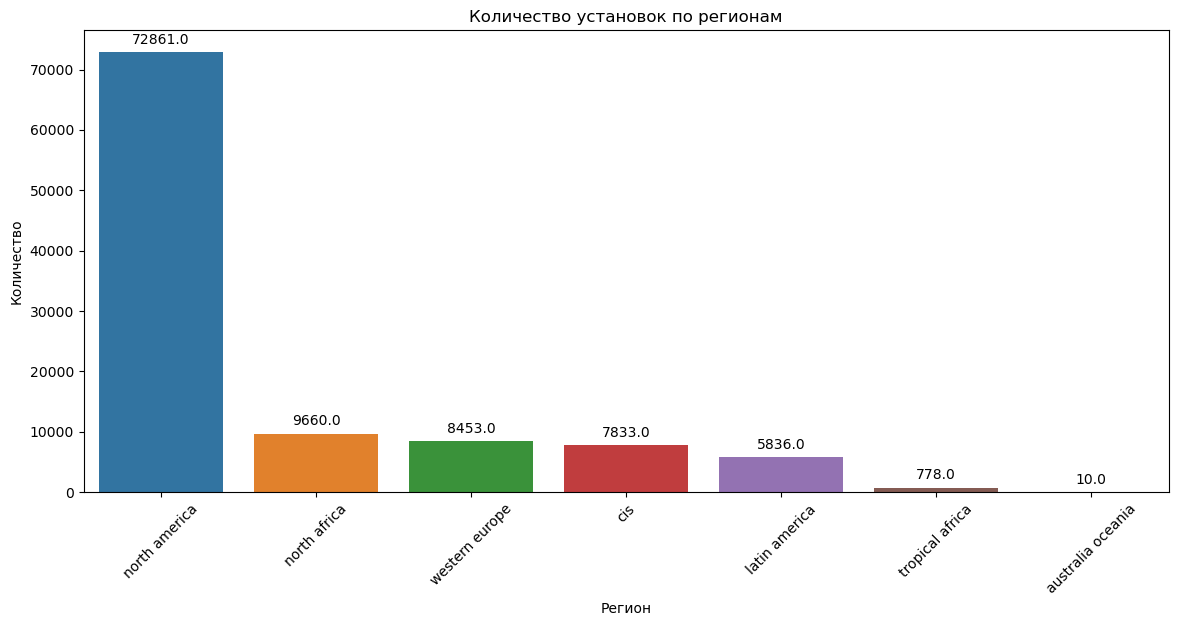

In [14]:
top_geo('installs','geo','installs','Количество установок по регионам')

Аналогичная ситуация с установками.

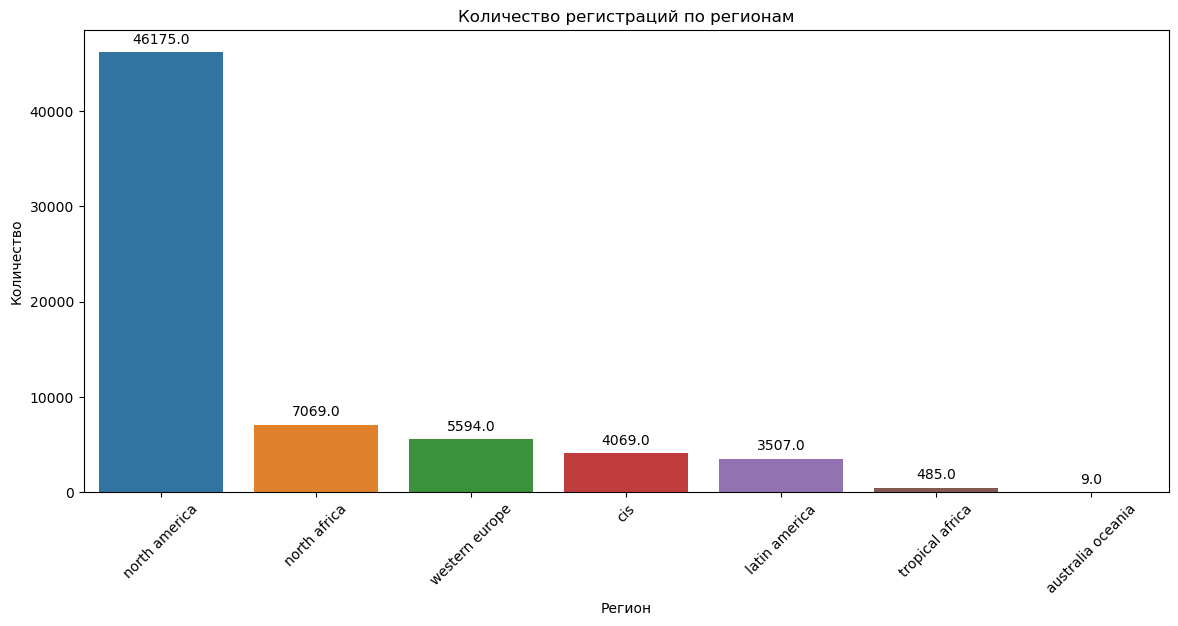

In [15]:
top_geo('registrations','geo','registrations','Количество регистраций по регионам')

По регистрациям тоже самое.

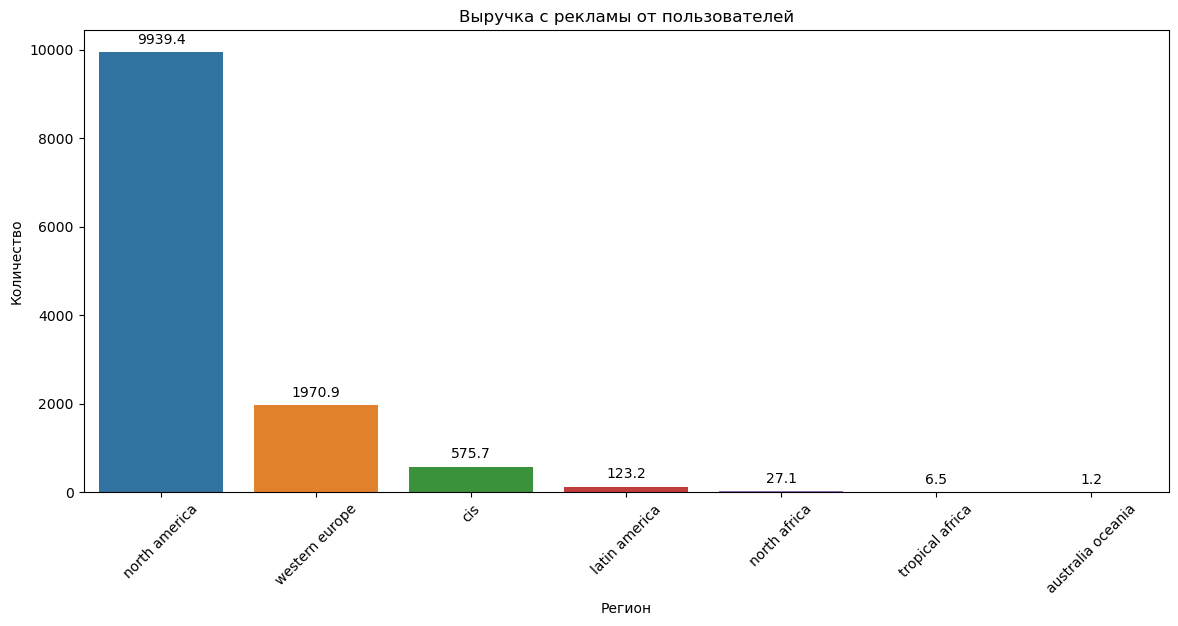

In [16]:
top_geo('revenue_ad30d','geo','revenue_ad30d','Выручка с рекламы от пользователей')

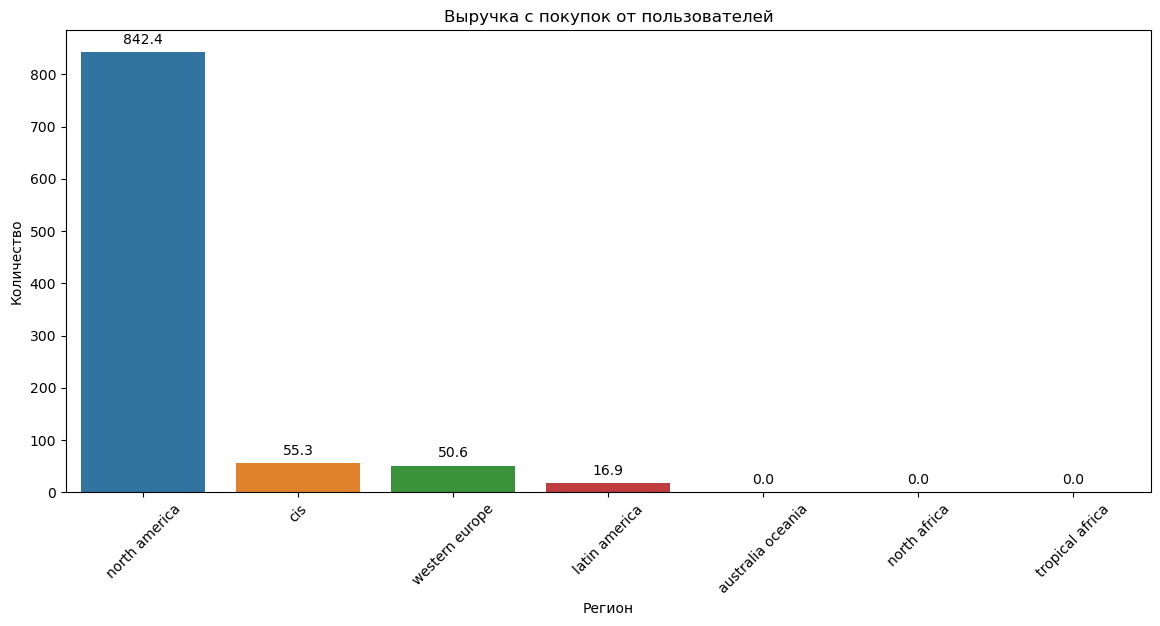

In [17]:
top_geo('revenue_in_app30d','geo','revenue_in_app30d','Выручка с покупок от пользователей')

По выручке с покупок стоит отметить, что регионы Автралия, Северная Африка, Тропическая Африка вообще не имеют выручки.

#### Топ 10 худших компаний

In [18]:
def top_company(byvalue,xvalue,yvalue,title):

    data = df.sort_values(by=byvalue, ascending=True).head(10)
    data.reset_index(drop=True, inplace=True)
    data['campaign_id'] = data['campaign_id'].astype('str')
    
    plt.figure(figsize = (14,6))

    ax = sns.barplot(x=xvalue, y=yvalue, data=data, hue='geo')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
    
    ax.set_title(title)
    ax.set_xlabel('Регион')
    ax.set_ylabel('Количество')

    plt.show()

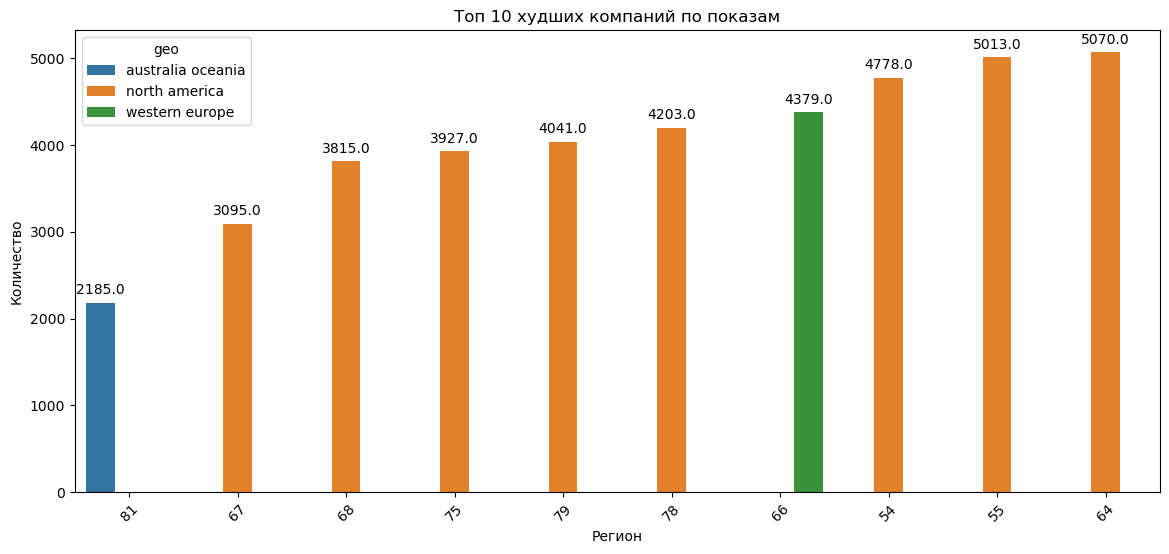

In [19]:
top_company('impressions','campaign_id','impressions','Топ 10 худших компаний по показам')

Самая худшая компания по показам - это единственная компания в регионе Австралия номер 81. Много компаний в Северной Америке имеют плохие результаты 67,68,75,79,78.

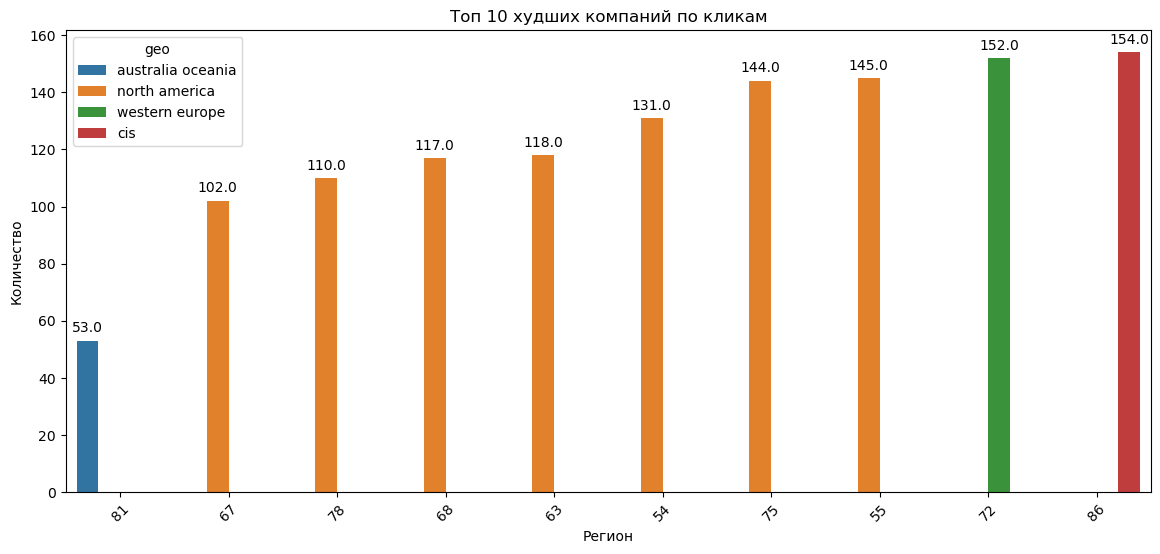

In [20]:
top_company('clicks','campaign_id','clicks','Топ 10 худших компаний по кликам')

Такая же ситуация и по кликам.

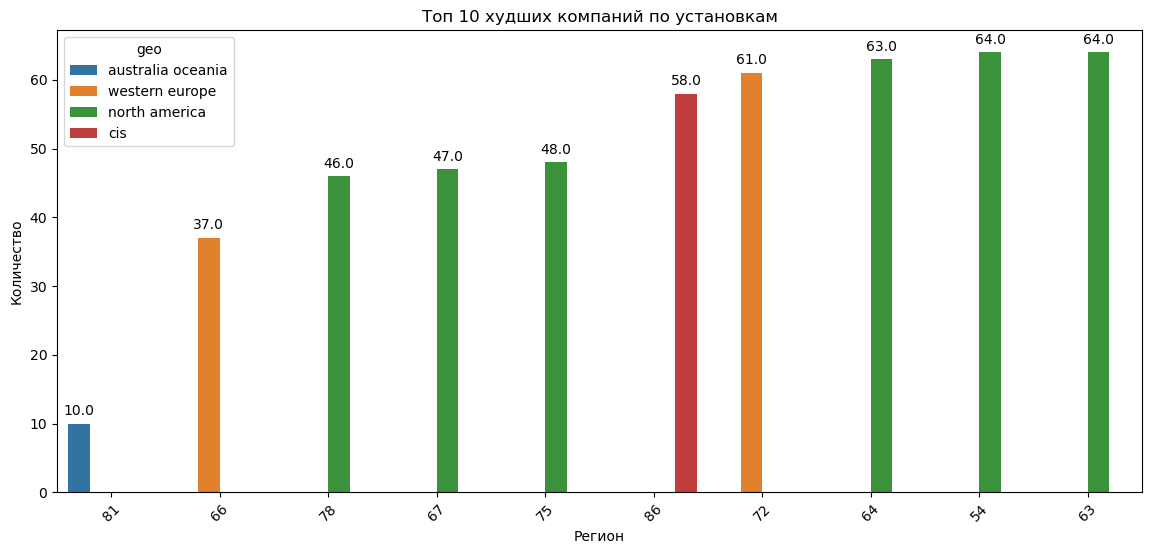

In [21]:
top_company('installs','campaign_id','installs','Топ 10 худших компаний по установкам')

Похожая ситуация и по установкам.

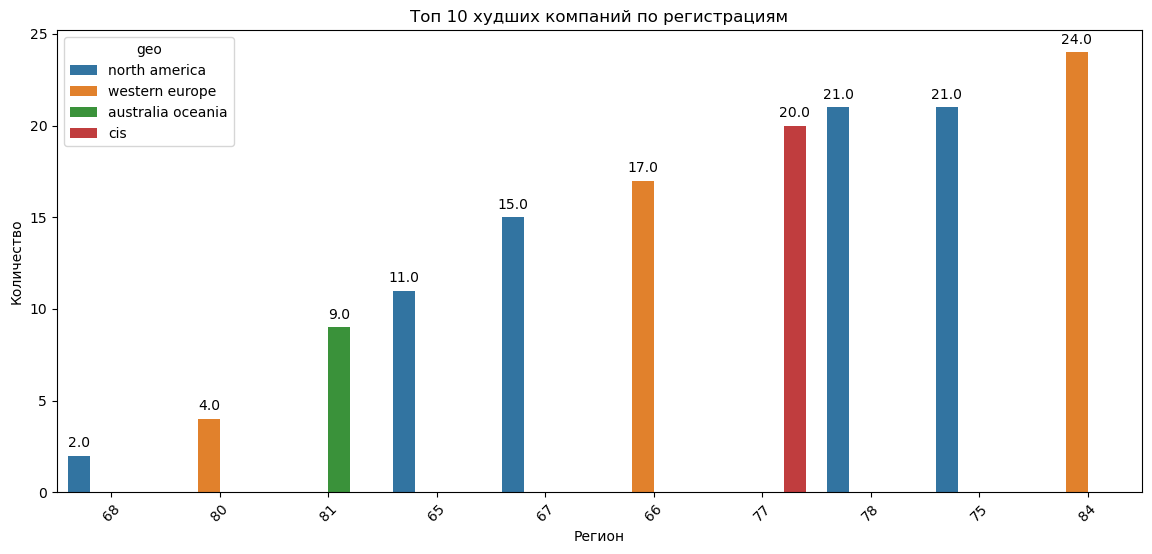

In [22]:
top_company('registrations','campaign_id','registrations','Топ 10 худших компаний по регистрациям')

По регистрациям хуже всех компания из Северной Америки 68. За ней идет компания 80 из Западной Европы и Австралийская компания.

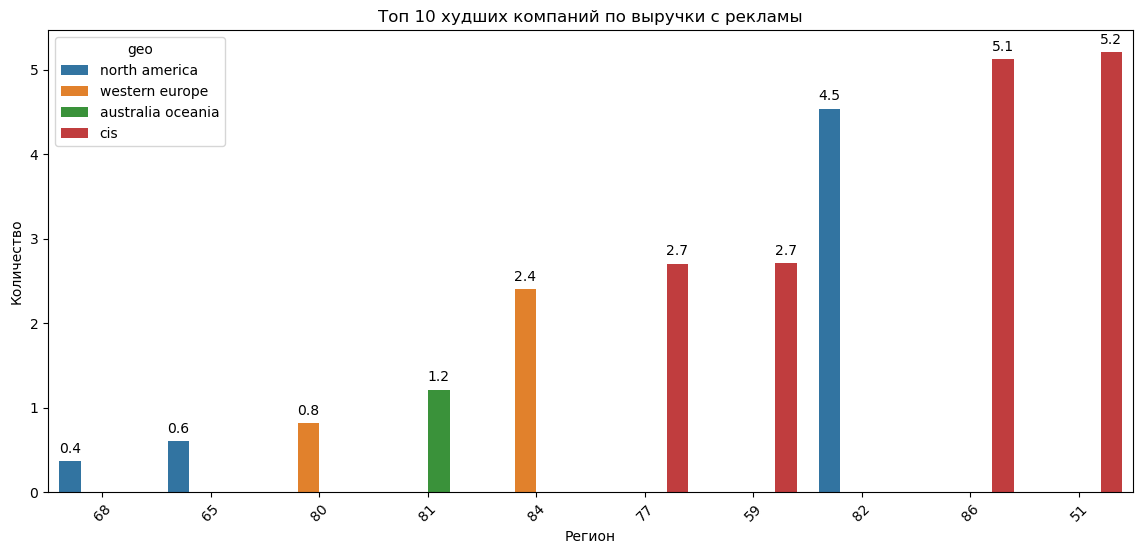

In [23]:
top_company('revenue_ad30d','campaign_id','revenue_ad30d','Топ 10 худших компаний по выручки с рекламы')

Помимо вышеупомянутых присутствуют и компании из региона cis с низкими показателями выручки с рекламы. (77,59)

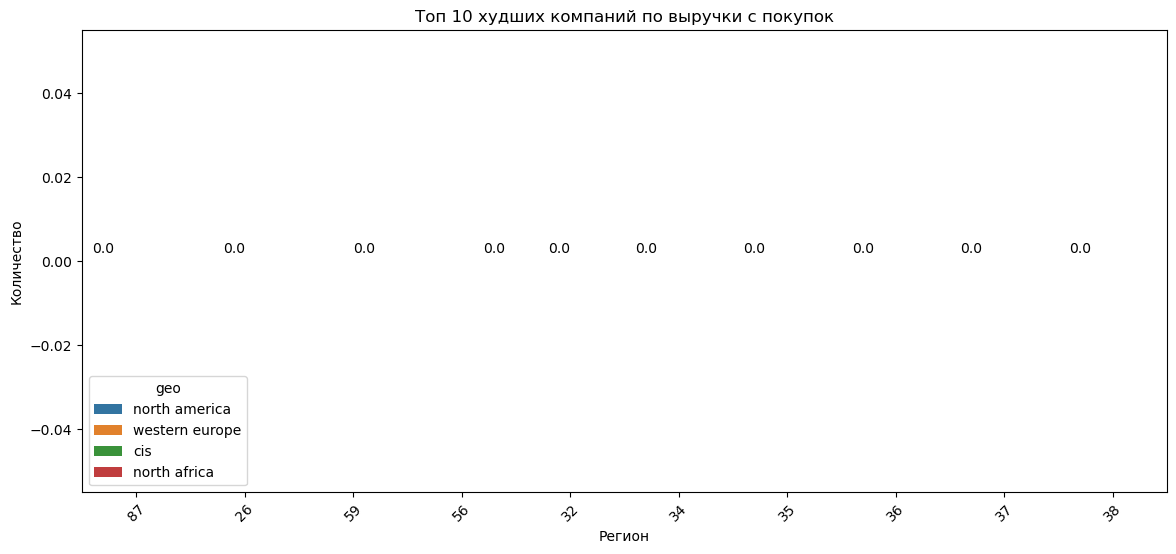

In [24]:
top_company('revenue_in_app30d','campaign_id','revenue_in_app30d','Топ 10 худших компаний по выручки с покупок')

Множество компаний вообзе не имеют выручки с покупок пользователей.

In [25]:
zero_revenue = df[df['revenue_in_app30d']==0] 
zero_revenue = zero_revenue.groupby('geo')['campaign_id'].count().reset_index()
zero_revenue

,geo,campaign_id
0,australia oceania,1
1,cis,5
2,north africa,2
3,north america,17
4,tropical africa,1
5,western europe,16


Регионы Автралия, Тропическая Африка, Северная Африка не имеют выручки с покупок. А Латинская Америка - единственный регион, где таких компаний нет.

In [26]:
all_company = all_company.drop(all_company[all_company['geo'] == 'latin america'].index).reset_index()

zero_revenue['campaign_id'] / all_company['campaign_id'] * 100

0    100.000000
1     50.000000
2    100.000000
3     35.416667
4    100.000000
5     72.727273
Name: campaign_id, dtype: float64

В процентном соотношении 35 процентов компаний Северной Америки не имеют выручки с покупок и целых 75 процентов в Западной Европе. Это говорит о очень маленькой выручке с покупок в целом по всем регионам кроме Северной Америки.

### 2. Оценка медиабайеров

In [27]:
df['buyer'].nunique()

5

Всего 5 медиобаеров.

In [28]:
df['payback1'] = df['revenue_ad1d'] + df['revenue_in_app1d'] - df['spend']
df['payback7'] = df['revenue_ad7d'] + df['revenue_in_app7d'] - df['spend']
df['payback30'] = df['revenue_ad30d'] + df['revenue_in_app30d'] - df['spend']

In [29]:
all_buyers = df.groupby('buyer')[['payback1','payback7','payback30']].sum().reset_index()
all_buyers

,buyer,payback1,payback7,payback30
0,buyer_1,-4294.988098,-3572.032912,-2922.452250
1,buyer_2,-3811.834162,-2412.066661,-1241.049372
2,buyer_3,-863.169668,-375.999617,204.748888
3,buyer_4,-609.244362,-417.361676,-178.526635
4,buyer_5,-509.476942,-448.023326,-426.094406


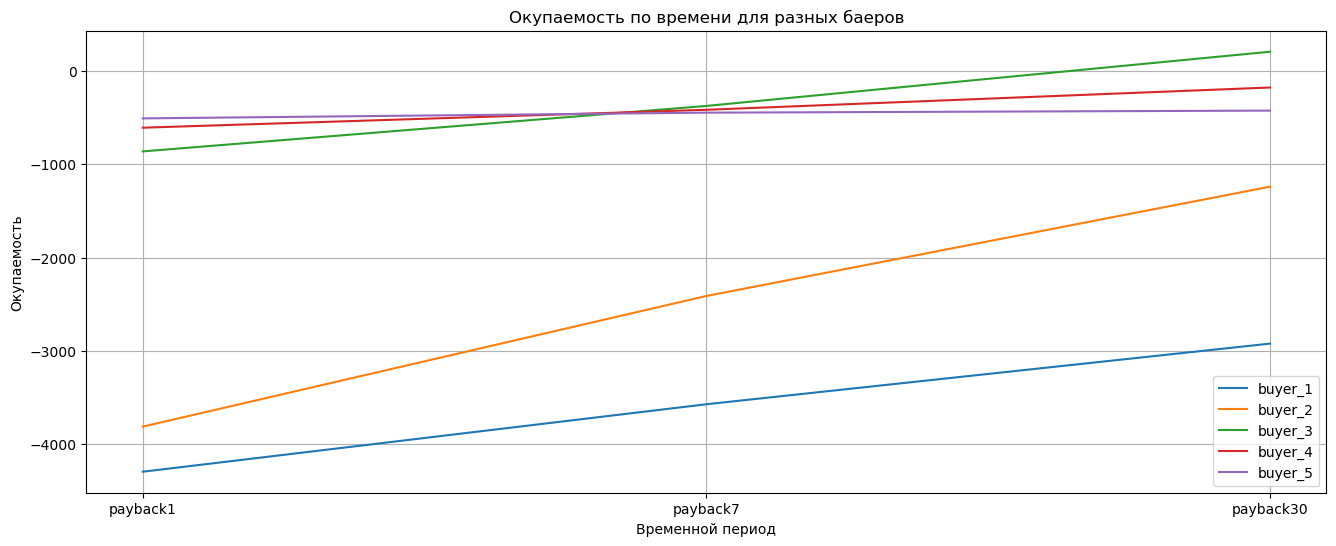

In [30]:

plt.figure(figsize=(16, 6))

for index, row in all_buyers.iterrows():
    plt.plot(['payback1', 'payback7', 'payback30'], row[['payback1', 'payback7', 'payback30']], label=row['buyer'])

plt.title('Окупаемость по времени для разных баеров')
plt.xlabel('Временной период')
plt.ylabel('Окупаемость')

plt.legend()
plt.grid(True)

plt.show()

Из графика видно, что у всех баеров положительная тенденция, но самый сильный рост у 1 и 2. Однако единственному баеру удалось окупиться - это 3.

In [31]:
all_buyers_geo = df.groupby(['buyer','geo'])[['payback1','payback7','payback30']].sum().reset_index()
all_buyers_geo['difference'] = (all_buyers_geo['payback1'] - all_buyers_geo['payback30']) / all_buyers_geo['payback1']*100
all_buyers_geo = all_buyers_geo.sort_values(by='difference',ascending=False)
all_buyers_geo

,buyer,geo,payback1,payback7,payback30,difference
7,buyer_3,north america,-863.169668,-375.999617,204.748888,123.720584
6,buyer_2,western europe,-996.145909,-607.499566,-178.619195,82.068973
10,buyer_4,western europe,-43.143819,-26.884026,-9.190507,78.697975
9,buyer_4,north america,-527.861675,-355.317739,-141.438686,73.205350
5,buyer_2,north america,-2327.732685,-1403.668343,-722.837371,68.946719
15,buyer_5,western europe,-109.377179,-66.315667,-57.930544,47.035986
0,buyer_1,cis,-247.473728,-197.853314,-156.421184,36.792812
2,buyer_1,north america,-3750.530226,-3102.341826,-2514.486054,32.956518
4,buyer_2,cis,-487.955568,-400.898752,-339.592806,30.404974
8,buyer_4,cis,-38.238868,-35.159911,-27.897442,27.044279


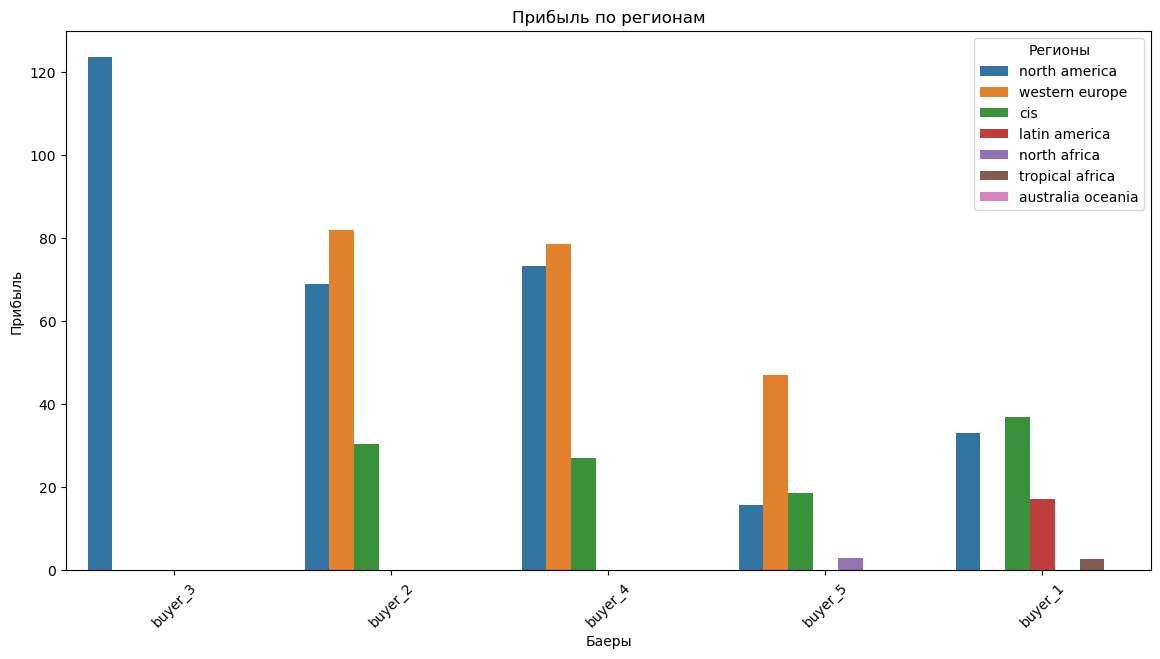

In [32]:
plt.figure(figsize = (14,7))
ax = sns.barplot(x='buyer', y='difference', data=all_buyers_geo, hue='geo')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_title('Прибыль по регионам')
ax.set_xlabel('Баеры')
ax.set_ylabel('Прибыль')
ax.legend(title='Регионы')
plt.show()

Баер с номером 3 работает лишь в одном регионе - Северная Америка и является лидером среди баеров этого региона по тенденции к окупаемости. Баеры 2 и 4 в равной степени по регионам Северная Америка, Западная Европа и имеют также неплохую тенденцию, но показатели cis ниже чем у баера 1. Баер 5 является худшим по всем показателям, но единственным, кто работает в Северной Африке.
Баер 1 Лидер в тенденции по cis. Стоит отметить, что он также лучший по регионам Латинской Америки и Тропической Африке.


### 3. Стоимость установки

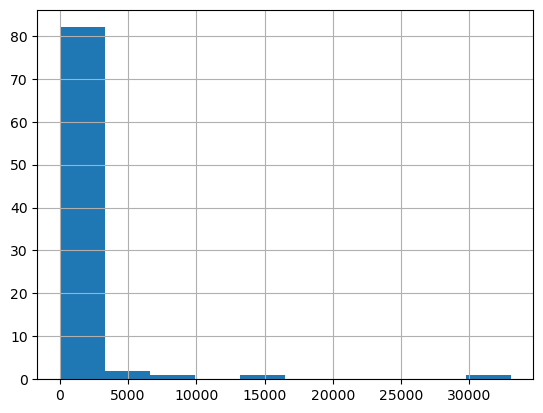

In [33]:
df['installs'].hist();

В основном количество установок в районе от 0 до 3 тысяч.

In [34]:
df['cpi']=df['spend'] / df['installs']

In [35]:
df.groupby('buyer')['cpi'].mean().sort_values().reset_index()

,buyer,cpi
0,buyer_1,0.212139
1,buyer_2,0.337293
2,buyer_4,0.417963
3,buyer_3,0.537483
4,buyer_5,0.546661


В отношение общих затрат на рекламу к количеству установок приложения лучший баер под номером 1, а худший 5.

In [36]:
df.groupby('geo')['cpi'].mean().sort_values().reset_index()

,geo,cpi
0,north africa,0.026336
1,tropical africa,0.053355
2,latin america,0.092223
3,cis,0.180955
4,western europe,0.343069
5,north america,0.403412
6,australia oceania,2.155000


По регионам этот показатель лучший у north africa, а худший у australia oceania.

In [37]:
df.groupby(['campaign_id','geo'])['cpi'].sum().sort_values().reset_index().head(10)

,campaign_id,geo,cpi
0,21,north africa,0.025330
1,56,north africa,0.027341
2,45,latin america,0.035084
3,27,latin america,0.045905
4,41,north america,0.051174
5,60,tropical africa,0.053355
6,24,north america,0.055159
7,57,north america,0.057558
8,69,north america,0.075552
9,87,north america,0.079109


Худшие компании: 23,56,45,23,41.

In [38]:
df.groupby(['campaign_id','geo'])['cpi'].sum().sort_values().reset_index().tail(10)

,campaign_id,geo,cpi
77,23,north america,0.577878
78,52,western europe,0.623506
79,55,north america,0.627887
80,58,western europe,0.637727
81,25,north america,0.642301
82,54,north america,0.703281
83,66,western europe,0.742162
84,37,north america,0.755781
85,20,north america,0.802027
86,81,australia oceania,2.155000


Лучшие: 23,52,55,58,23.

### 4. Выручка и покупки

In [39]:
df['total1'] = df['revenue_ad1d'] + df['revenue_in_app1d']
df['total7'] = df['revenue_ad7d'] + df['revenue_in_app7d']
df['total30'] = df['revenue_ad30d'] + df['revenue_in_app30d']

In [40]:
df.groupby('geo')['total30'].sum().sort_values(ascending=False).reset_index()

,geo,total30
0,north america,10781.810111
1,western europe,2021.479753
2,cis,630.972277
3,latin america,140.043132
4,north africa,27.086440
5,tropical africa,6.451855
6,australia oceania,1.212664


По общей выручке лидер - Северная Америка. Аутсайдер Австралия.

In [41]:
df.groupby('buyer')['total30'].sum().sort_values(ascending=False).reset_index()

,buyer,total30
0,buyer_2,5984.400624
1,buyer_1,4288.697750
2,buyer_3,2158.468897
3,buyer_4,962.543371
4,buyer_5,214.945590


Лидер баер 2, аутсайдер баер 5

In [42]:
total_company = df.groupby('campaign_id')[['total1','total7','total30']].sum().reset_index() \
.sort_values(by='total30',ascending=False).head(10)
total_company

,campaign_id,total1,total7,total30
0,1,1325.741409,1581.060061,1803.643833
1,2,870.309639,1270.304698,1569.251829
3,4,628.908160,863.553888,1100.361597
7,8,337.633212,523.704634,818.539189
4,5,446.837239,597.679082,746.704180
2,3,462.942600,549.687826,597.333765
12,13,232.595353,345.560940,469.249636
6,7,268.227545,393.553395,466.032081
5,6,246.974412,341.628179,415.913611
8,9,211.245058,304.565037,412.859658


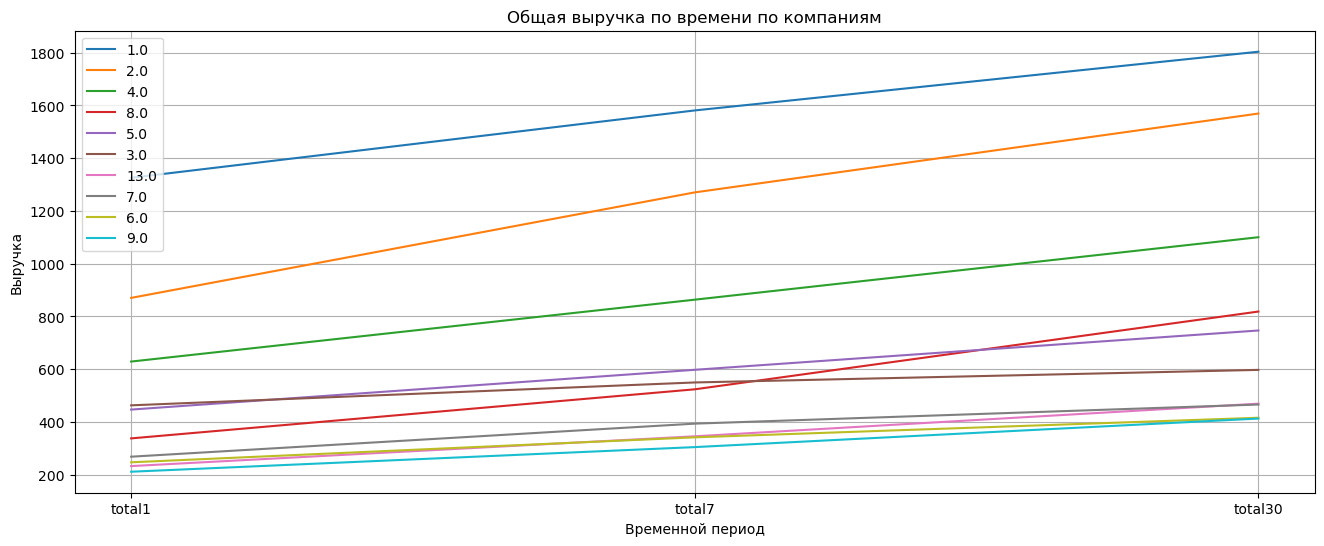

In [43]:

plt.figure(figsize=(16, 6))

for index, row in total_company.iterrows():
    plt.plot(['total1','total7','total30'], row[['total1','total7','total30']], label=row['campaign_id'])

plt.title('Общая выручка по времени по компаниям')
plt.xlabel('Временной период')
plt.ylabel('Выручка')

plt.legend()
plt.grid(True)

plt.show()

По общей выручке примерно равный рост имеют все 10 лидирующих компаний, но стоит выделить 1,2,4.

In [44]:
total_payers = df.groupby('campaign_id')[['payers1d','payers7d','payers30d']].sum().reset_index() \
.sort_values(by='payers30d',ascending=False).head(10)
total_payers

,campaign_id,payers1d,payers7d,payers30d
0,1,64,79,83
1,2,17,19,22
3,4,11,12,12
8,9,6,9,10
10,11,6,8,10
2,3,4,6,6
13,14,5,6,6
4,5,4,5,6
15,16,2,5,6
23,24,4,5,5


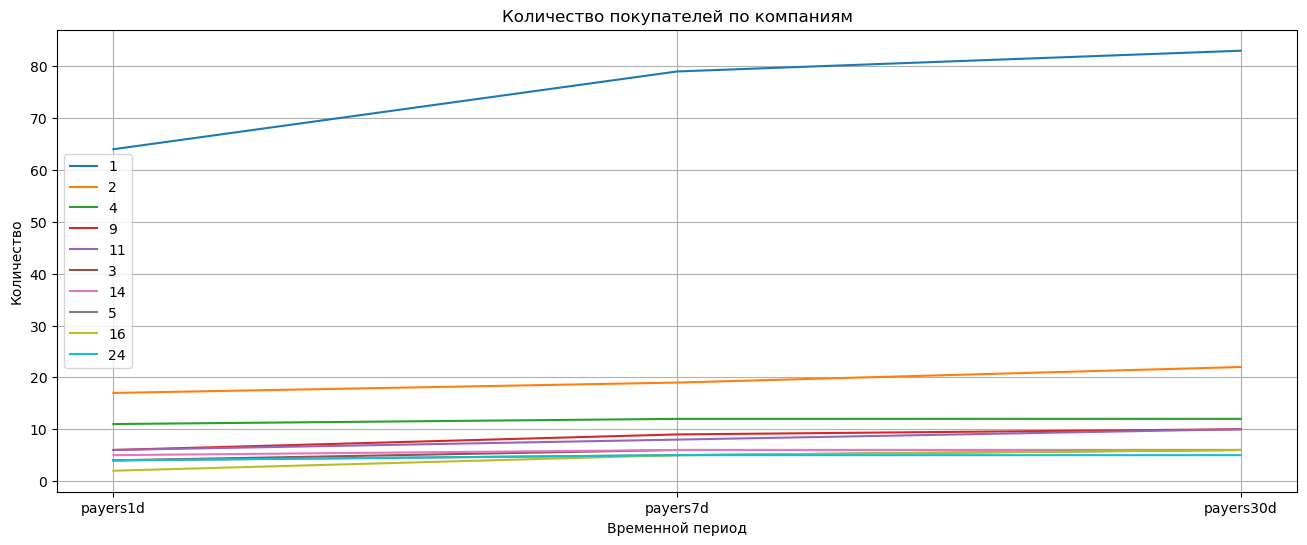

In [45]:
plt.figure(figsize=(16, 6))

for index, row in total_payers.iterrows():
    plt.plot(['payers1d','payers7d','payers30d'], row[['payers1d','payers7d','payers30d']], label=row['campaign_id'])

plt.title('Количество покупателей по компаниям')
plt.xlabel('Временной период')
plt.ylabel('Количество')

plt.legend()
plt.grid(True)

plt.show()

По количеству пользователей абсолютный лидер компания 1.

# Вывод

Общий вывод на основе предоставленной информации следующий:

В данном датасете представлено 7 регионов, причем больше всего компаний находится в регионе Северная Америка, а наименьшее количество в регионах Австралия и Океания, и Тропическая Африка.

Регион Северная Америка выделяется наибольшим количеством показов, кликов, установок и регистраций, что делает его лидером по многим метрикам.

Самые низкие показатели у регионов Тропическая Африка и Австралия Океания во всех аспектах, включая выручку.

Северная Африка и Латинская Америка также имеют относительно низкие показатели по сравнению с другими регионами.

Выручка от покупок пользователей практически отсутствует в регионах Австралия, Тропическая Африка и Северная Африка, что является заметным недостатком для этих регионов.

Большинство компаний в Северной Америке имеют низкие показатели, но есть несколько более успешных компаний, которые справляются лучше.

В регионе Северная Америка также наиболее успешный медиобаер, который окупился, что говорит о его эффективности.

Общая тенденция по росту выручки у большинства компаний положительная, но лучшие результаты показывают компании 1, 2 и 4.

Компания 1 лидирует в регионе СНГ, Латинской Америке и Тропической Африке, что делает ее одной из наиболее успешных в этом датасете.

По общему количеству пользователей абсолютным лидером является компания 1.

В целом, Северная Америка и компания 1 выделяются как наиболее успешные регион и компания соответственно, в то время как Австралия, Тропическая Африка и Северная Африка имеют низкие показатели и потребуют дополнительных усилий для улучшения результатов.


## Рекомендации:

Анализ регионов:

Пересмотрите стратегию в регионах с низкими показателями, такими как Австралия, Океания, Тропическая Африка и Северная Африка. Рассмотрите возможность увеличения бюджета или адаптации рекламных кампаний под местные особенности.